# WeatherPy

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [3]:
print(cities)

['yurimaguas', 'elmendorf air force base', 'ilulissat', 'fortaleza', 'georgetown', 'thunder bay', 'tsiombe', 'edinburgh of the seven seas', 'olonkinbyen', 'el calafate', 'aasiaat', 'grytviken', 'waitangi', 'hithadhoo', 'bethel', "st. john's", 'seydi', 'hermanus', 'fuvahmulah', 'enewetak', 'sint-truiden', 'northam', 'fale old settlement', 'acajutla', 'west island', 'malanje', 'fort bragg', 'udachny', 'adamstown', 'san pedro pochutla', 'badger', 'anadyr', 'onega', 'thompson', 'hilo', 'blackmans bay', 'longyearbyen', 'margate', 'weno', 'port-aux-francais', 'dzhalagash', 'gualaceo', 'taiohae', 'vadso', 'fayzabad', 'monchegorsk', 'puerto natales', 'heishan', 'constantia', 'praia da vitoria', 'yanam', 'tazovsky', 'mitu', 'bilibino', 'port elizabeth', 'talnakh', 'puerto ayora', 'yellowknife', 'papatowai', 'codrington', 'tura', 'nemuro', 'haiku-pauwela', 'cidreira', 'stanley', 'punta arenas', 'petropavlovsk-kamchatsky', 'mount isa', 'mpika', 'kristiansund', 'nushki', 'vorgashor', 'kulia villag

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    params = {'q': city, 'appid': weather_api_key, 'units': 'metric'}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url, params=params)
        data_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data_json['coord']['lat']
        city_lng = data_json['coord']['lon']
        city_max_temp = data_json['main']['temp_max']
        city_humidity = data_json['main']['humidity']
        city_clouds = data_json['clouds']['all']
        city_wind = data_json['wind']['speed']
        city_country = data_json['sys']['country']
        city_date = data_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yurimaguas
Processing Record 2 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | fortaleza
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | thunder bay
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | el calafate
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | st. john's
Processing Record 17 of Set 1 | seydi
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of 

Processing Record 40 of Set 4 | kapuskasing
Processing Record 41 of Set 4 | leo
Processing Record 42 of Set 4 | utrik
Processing Record 43 of Set 4 | castillos
Processing Record 44 of Set 4 | eyl
Processing Record 45 of Set 4 | sosnovka
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | prado
Processing Record 48 of Set 4 | willmar
Processing Record 49 of Set 4 | kokoda
Processing Record 0 of Set 5 | datong
Processing Record 1 of Set 5 | birine
Processing Record 2 of Set 5 | port moresby
Processing Record 3 of Set 5 | santana
Processing Record 4 of Set 5 | erenhot
Processing Record 5 of Set 5 | gaozhou
Processing Record 6 of Set 5 | sekong
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | touros
Processing Record 9 of Set 5 | kuantan
Processing Record 10 of Set 5 | vilyuchinsk
Processing Record 11 of Set 5 | nouadhibou
Processing Record 12 of Set 5 | bengkulu
Processing Record 13 of Set 5 | berea
Processing Record 14 of Set 5 | kailua-kona
Processin

Processing Record 33 of Set 8 | kataragama
City not found. Skipping...
Processing Record 34 of Set 8 | taksimo
Processing Record 35 of Set 8 | fort st. john
Processing Record 36 of Set 8 | cheremukhovo
Processing Record 37 of Set 8 | i-n-salah
Processing Record 38 of Set 8 | viqueque
Processing Record 39 of Set 8 | katabu
Processing Record 40 of Set 8 | coruripe
Processing Record 41 of Set 8 | suva
Processing Record 42 of Set 8 | mgandu
Processing Record 43 of Set 8 | saratamata
City not found. Skipping...
Processing Record 44 of Set 8 | kyzylorda
Processing Record 45 of Set 8 | ikwiriri
Processing Record 46 of Set 8 | talakan
Processing Record 47 of Set 8 | mpulungu
Processing Record 48 of Set 8 | pimentel
Processing Record 49 of Set 8 | hasaki
Processing Record 0 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 1 of Set 9 | port isabel
Processing Record 2 of Set 9 | aykhal
Processing Record 3 of Set 9 | ca mau
Processing Record 4 of Set 9 | sechura
Processing Record 5

Processing Record 23 of Set 12 | lata
Processing Record 24 of Set 12 | pibor
City not found. Skipping...
Processing Record 25 of Set 12 | key west
Processing Record 26 of Set 12 | fabens
Processing Record 27 of Set 12 | dul'durga
Processing Record 28 of Set 12 | zheleznodorozhnyy
Processing Record 29 of Set 12 | bandar lampung
Processing Record 30 of Set 12 | aomori
Processing Record 31 of Set 12 | velykyy bychkiv
City not found. Skipping...
Processing Record 32 of Set 12 | am djarass
City not found. Skipping...
Processing Record 33 of Set 12 | turaiyur
Processing Record 34 of Set 12 | hun
Processing Record 35 of Set 12 | tabou
Processing Record 36 of Set 12 | toga village
City not found. Skipping...
Processing Record 37 of Set 12 | paris
Processing Record 38 of Set 12 | lerwick
Processing Record 39 of Set 12 | markovo
Processing Record 40 of Set 12 | tirumullaivasal
Processing Record 41 of Set 12 | turaif
Processing Record 42 of Set 12 | cascais
Processing Record 43 of Set 12 | tukrah

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yurimaguas,-5.9000,-76.0833,23.88,92,100,1.37,PE,1707794527
1,ilulissat,69.2167,-51.1000,-24.99,58,74,1.54,GL,1707794527
2,fortaleza,-3.7227,-38.5247,29.01,83,40,3.60,BR,1707794401
3,georgetown,5.4112,100.3354,30.97,58,20,2.57,MY,1707794528
4,thunder bay,48.4001,-89.3168,-10.01,85,0,1.54,CA,1707794528
...,...,...,...,...,...,...,...,...,...
560,turaif,31.6725,38.6637,7.14,81,0,4.12,SA,1707794673
561,cascais,38.6979,-9.4215,18.06,98,100,9.83,PT,1707794673
562,tukrah,32.5341,20.5791,13.53,69,4,4.43,LY,1707794673
563,kolonia,50.9333,6.9500,4.93,90,75,1.54,DE,1707794673


In [7]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yurimaguas,-5.9000,-76.0833,23.88,92,100,1.37,PE,1707794527
1,ilulissat,69.2167,-51.1000,-24.99,58,74,1.54,GL,1707794527
2,fortaleza,-3.7227,-38.5247,29.01,83,40,3.60,BR,1707794401
3,georgetown,5.4112,100.3354,30.97,58,20,2.57,MY,1707794528
4,thunder bay,48.4001,-89.3168,-10.01,85,0,1.54,CA,1707794528
5,tsiombe,-25.3000,45.4833,23.24,93,97,4.29,MG,1707794528
6,edinburgh of the seven seas,-37.0676,-12.3116,17.28,76,92,6.28,SH,1707794528
7,olonkinbyen,70.9221,-8.7187,-1.70,97,100,9.40,SJ,1707794529
8,el calafate,-50.3408,-72.2768,10.61,61,97,2.09,AR,1707794529
9,aasiaat,68.7098,-52.8699,-26.56,100,56,2.75,GL,1707794529


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yurimaguas,-5.9000,-76.0833,23.88,92,100,1.37,PE,1707794527
1,ilulissat,69.2167,-51.1000,-24.99,58,74,1.54,GL,1707794527
2,fortaleza,-3.7227,-38.5247,29.01,83,40,3.60,BR,1707794401
3,georgetown,5.4112,100.3354,30.97,58,20,2.57,MY,1707794528
4,thunder bay,48.4001,-89.3168,-10.01,85,0,1.54,CA,1707794528


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

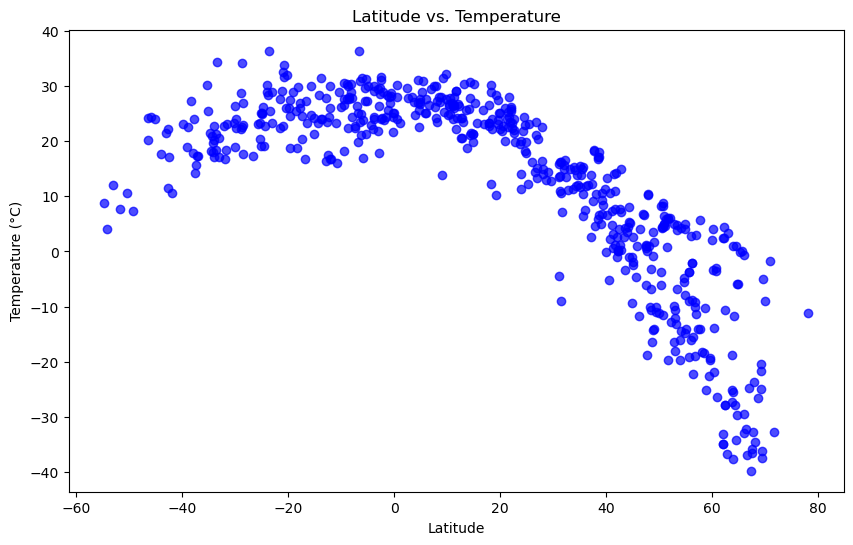

In [10]:
# Build scatter plot for latitude vs. temperature
data = city_data_df

# Create the scatter plot
plt.figure(figsize=(10, 6)) 

# Scatter plot
plt.scatter(data['Lat'], data['Max Temp'], color='blue', alpha=0.7)

# Add labels and title
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

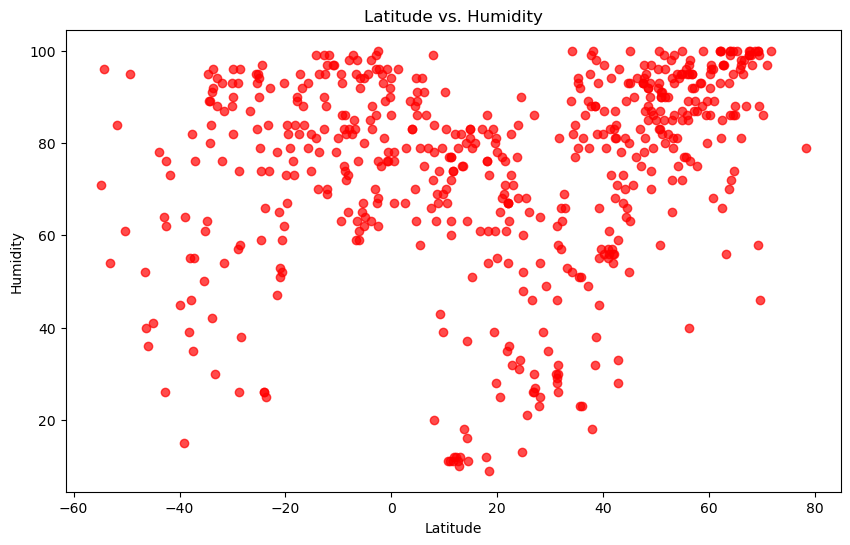

In [11]:
# Build the scatter plots for latitude vs. humidity
data = city_data_df

# Create the scatter plot
plt.figure(figsize=(10, 6)) 

# Scatter plot
plt.scatter(data['Lat'], data['Humidity'], color='red', alpha=0.7)

# Add labels and title
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

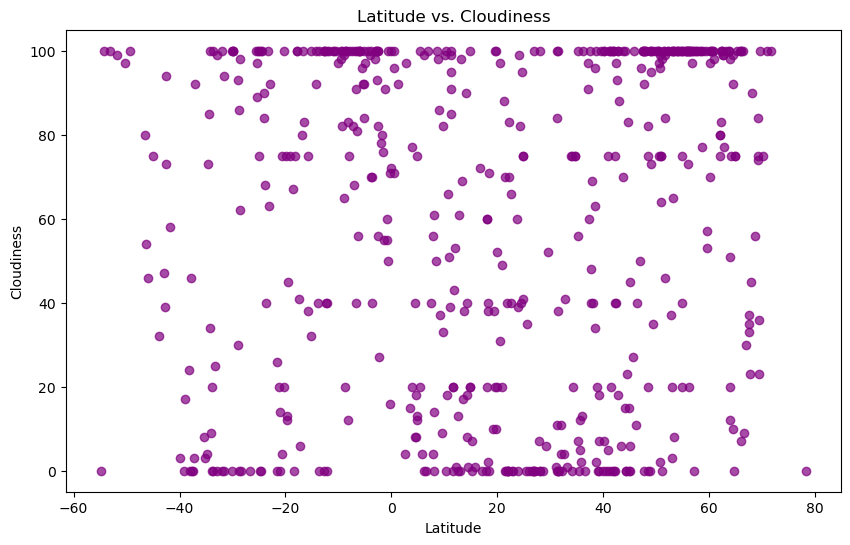

In [12]:
# Build the scatter plots for latitude vs. cloudiness
data = city_data_df

plt.figure(figsize=(10, 6)) 

plt.scatter(data['Lat'], data['Cloudiness'], color='purple', alpha=0.7)

plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

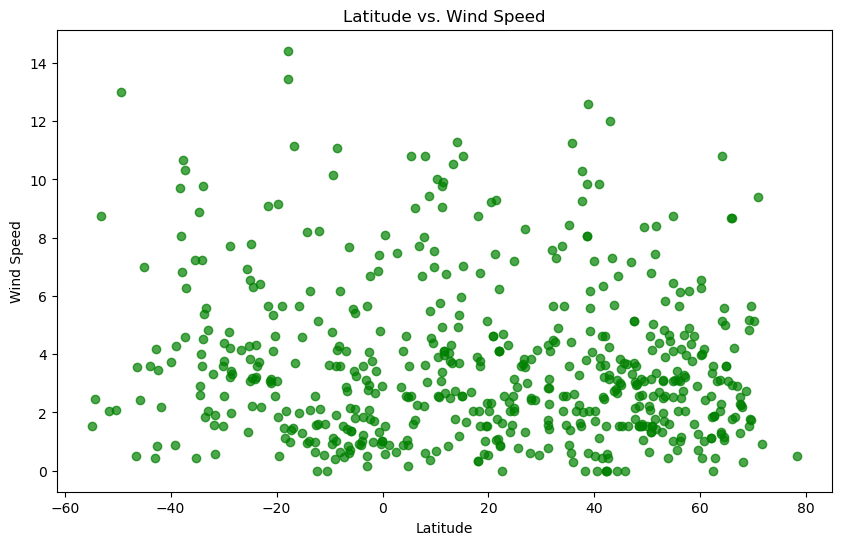

In [13]:
# Build the scatter plots for latitude vs. wind speed
data = city_data_df

plt.figure(figsize=(10, 6)) 

plt.scatter(data['Lat'], data['Wind Speed'], color='green', alpha=0.7)

plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
data = city_data_df 

northern_hemi_df = data[data['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,-24.99,58,74,1.54,GL,1707794527
3,georgetown,5.4112,100.3354,30.97,58,20,2.57,MY,1707794528
4,thunder bay,48.4001,-89.3168,-10.01,85,0,1.54,CA,1707794528
7,olonkinbyen,70.9221,-8.7187,-1.70,97,100,9.40,SJ,1707794529
9,aasiaat,68.7098,-52.8699,-26.56,100,56,2.75,GL,1707794529


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
data = city_data_df

southern_hemi_df = data[data['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yurimaguas,-5.9000,-76.0833,23.88,92,100,1.37,PE,1707794527
2,fortaleza,-3.7227,-38.5247,29.01,83,40,3.60,BR,1707794401
5,tsiombe,-25.3000,45.4833,23.24,93,97,4.29,MG,1707794528
6,edinburgh of the seven seas,-37.0676,-12.3116,17.28,76,92,6.28,SH,1707794528
8,el calafate,-50.3408,-72.2768,10.61,61,97,2.09,AR,1707794529


###  Temperature vs. Latitude Linear Regression Plot

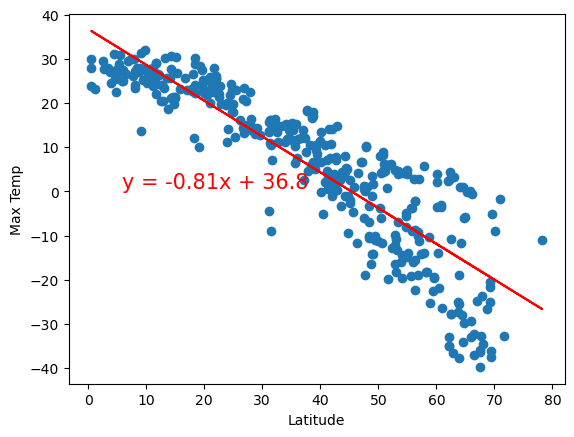

The r-value is -0.8863992926949444


In [34]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = northern_hemi_df['Lat'] # Latitude as x-values
y_values = northern_hemi_df['Max Temp']  # Maximum temperature as y-values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is {rvalue}")

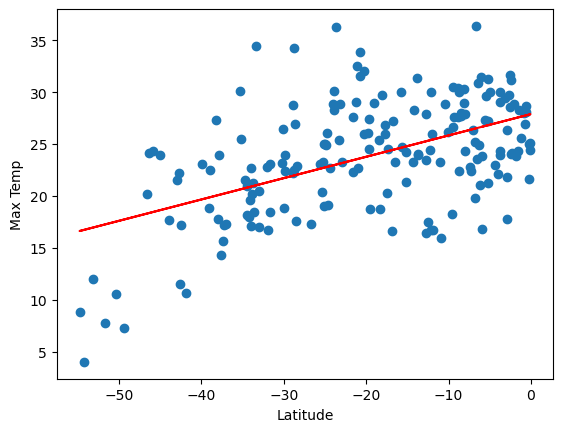

The r-value is 0.5229641495031588


In [35]:
# Linear regression on Southern Hemisphere

from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = southern_hemi_df['Lat'] # Latitude as x-values
y_values = southern_hemi_df['Max Temp']  # Maximum temperature as y-values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** This is the strongest correlation of all of the linear regression plots. The northern hemisphere has an almost perfect negative association, while the southern hemisphere has a moderate positive association. 

### Humidity vs. Latitude Linear Regression Plot

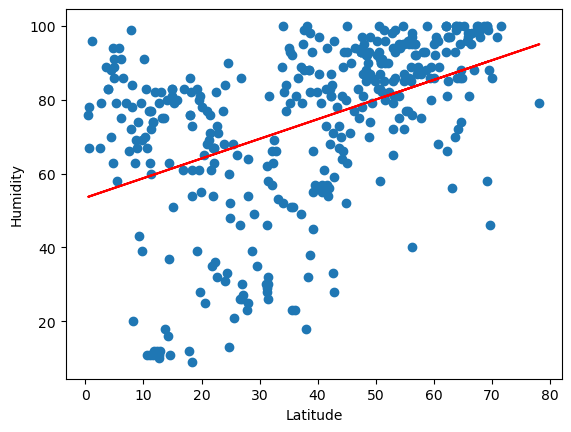

The r-value is 0.44843825113754776


In [36]:
# Northern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']  

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is {rvalue}")

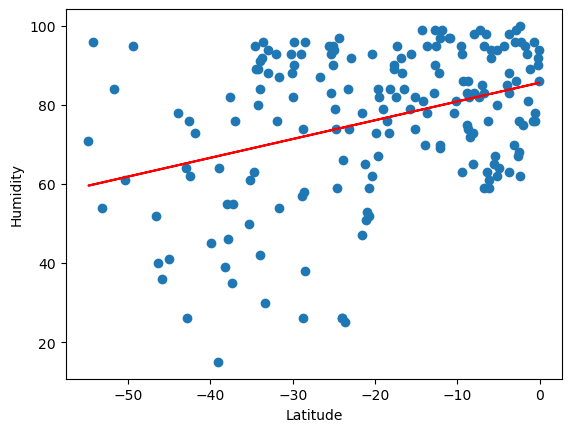

The r-value is 0.3578642288796302


In [37]:
# Southern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** The northern hemisphere has a moderate correlation, given it's decently high r-value. The southern hemisphere has less of a correlation between latitude and humidity, but it's not nothing!

### Cloudiness vs. Latitude Linear Regression Plot

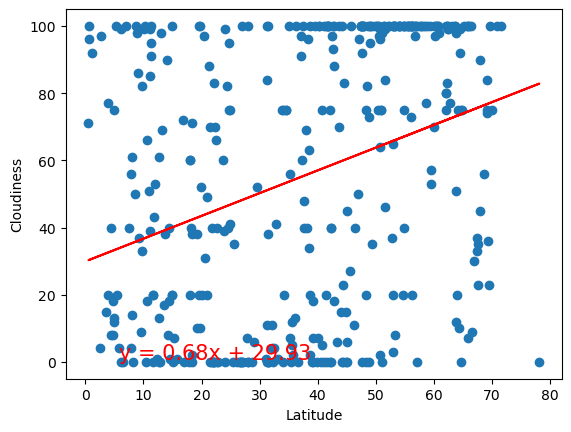

The r-value is 0.3264486602154642


In [38]:
# Northern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = northern_hemi_df['Lat'] # Latitude as x-values
y_values = northern_hemi_df['Cloudiness']  # Maximum temperature as y-values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is {rvalue}")

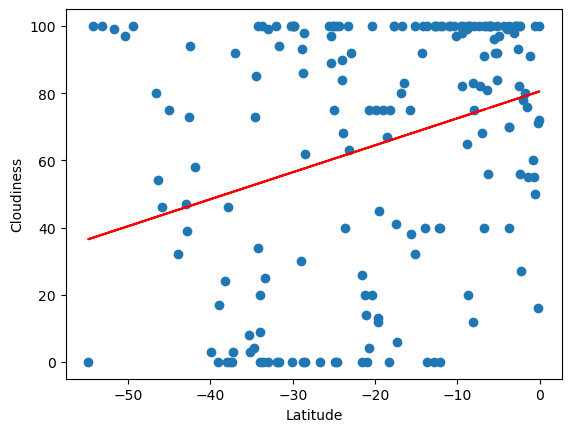

The r-value is 0.3013253368042159


In [39]:
# Southern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is {rvalue}")

### Wind Speed vs. Latitude Linear Regression Plot

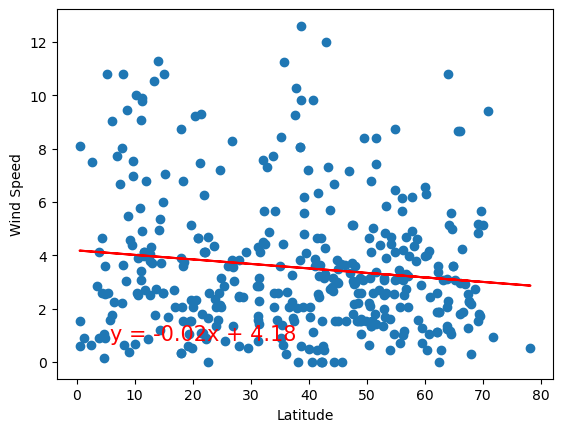

The r-value is -0.12681480685325697


In [40]:
# Northern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = northern_hemi_df['Lat'] # Latitude as x-values
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is {rvalue}")

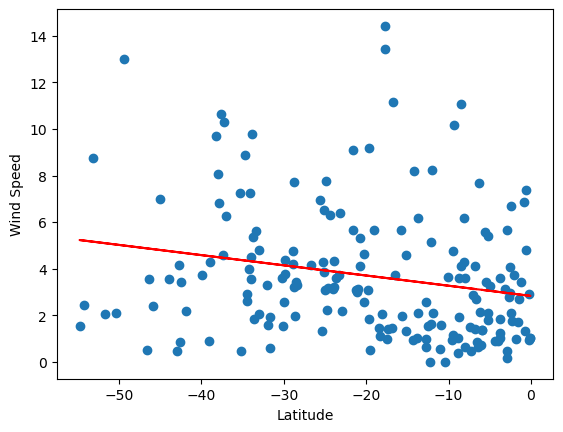

The r-value is -0.21692086996950105


In [41]:
# Southern Hemisphere
from scipy.stats import linregress
import matplotlib.pyplot as plt

x_values = southern_hemi_df['Lat'] # Latitude as x-values
y_values = southern_hemi_df['Wind Speed']  # Maximum temperature as y-values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** The r-value of the Southern Hemisphere indicates that there is a weak correlation between latitude and wind speed, while the Northern Hemisphere shows almost zero correlation. 